# 🏠 Problem Definition
# 🎯 Objective: 
# The goal is to determine the Water quality condition based on various environmental parameters.

# 📌 This is a Classification problem, where the objective is to use a machine learning model to predict the exact Water quality status given new input parameters.


In [1]:
# Data Collection
import pandas as pd
import numpy as np

#Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Data partitioning and model tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# Calling regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Model Evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Determining the explanatory power of a model (SHAP) 
import shap  




In [2]:
# 1) First, we will show the available handlers and their formats.
import logging, sys

print("Current root handlers and their format strings:")
for i, h in enumerate(logging.root.handlers):
    fmt = None
    try:
        fmt = h.formatter._fmt if h.formatter else None
    except Exception as e:
        fmt = f"<error reading formatter: {e}>"
    print(i, type(h), "format:", fmt)

# 2)If there are old/broken handlers, we will delete them.
for h in logging.root.handlers[:]:
    logging.root.removeHandler(h)

# 3) We add new, correct formatters and handlers (file + console)
logger = logging.getLogger()         # root logger
logger.setLevel(logging.INFO)

correct_fmt = "%(asctime)s - %(levelname)s - %(message)s"
formatter = logging.Formatter(correct_fmt)

# File handler
fh = logging.FileHandler("Info_Log.log", mode="a", encoding="utf-8")
fh.setFormatter(formatter)
logger.addHandler(fh)

# Console/stream handler (usually useful for Jupyter)
sh = logging.StreamHandler(sys.stdout)
sh.setFormatter(formatter)
logger.addHandler(sh)

# 4) Test: now we write test logs
logger.info("Logging reconfigured successfully (test message).")
logger.error("If you see this message, logging is working.")

# 5) Now our file reading code:
try:
    import pandas as pd
    df = pd.read_csv("water_potability.csv")
    logger.info("Data Set Uploaded Successfully")
except FileNotFoundError as e:
    logger.error("Data Set Not Found: %s", e)
except Exception as e:
    logger.exception("Other error while loading dataset: %s", e)



Current root handlers and their format strings:
2025-08-28 14:48:59,579 - INFO - Logging reconfigured successfully (test message).
2025-08-28 14:48:59,580 - ERROR - If you see this message, logging is working.
2025-08-28 14:48:59,605 - INFO - Data Set Uploaded Successfully


## 📊 Dataset Overview  

Before performing analysis and visualization, let's first take a look at the dataset to understand its structure, features, and available information.


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 💧 Water Quality Dataset – Feature Description

## 🔎 Key Features

- **pH**  
  Measure of the acidity or alkalinity of water. A neutral pH is 7; values below 7 indicate acidity, while values above 7 indicate alkalinity.

- **Hardness**  
  Concentration of dissolved calcium and magnesium salts, contributing to water hardness.

- **Solids (TDS)**  
  Total Dissolved Solids in water. High TDS may affect taste, odor, and overall quality.

- **Chloramines**  
  Disinfectant compound formed by mixing chlorine and ammonia, commonly used in water treatment.

- **Sulfate**  
  Concentration of sulfate ions in water. Excessive levels may affect taste and health.

- **Conductivity**  
  Ability of water to conduct electricity, directly related to the concentration of dissolved ions.

- **Organic_carbon**  
  Amount of organic carbon present, indicating possible contamination or pollutants.

- **Trihalomethanes (THMs)**  
  Chemical by-products formed during the disinfection process with chlorine.

- **Turbidity**  
  Cloudiness or haziness of water caused by suspended particles, affecting clarity.

- **Potability**  
  Indicates whether water is safe for human consumption.  
  - `1` → Drinkable  
  - `0` → Not drinkable



## 📉 Missing Data Analysis  

To better understand the dataset quality, we calculate the **percentage of missing values** for each feature.  
This helps identify which columns may require data cleaning, imputation, or removal before further analysis.


In [ ]:
missing_data = df.isnull().sum()
total = df.isnull().count()
percent = (missing_data/total) * 100
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ph,491,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,4.945055
Turbidity,0,0.000000
Potability,0,0.000000


# 📊 Data Overview

- **Shape:** 3275 rows × 10 columns  
- **Missing Values:**  
  - `ph` → 491  
  - `Sulfate` → 781  
  - `Trihalomethanes` → 162  
- **Data Types:** Mostly numeric (`float64`, `int64`)



## 🛠 Handling Missing Data  

To ensure data quality and reliability, we address the missing values in key features.  
This step is crucial before performing any statistical analysis or machine learning tasks.


In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [4]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 📊 Correlation Analysis with Water Quality  

In this step, we:  
- Select only **numeric features** from the dataset.  
- Compute their **correlation** with the target variable `Potability` (Water Quality).  
- Sort features based on their correlation strength.  
- Visualize the results using a **heatmap** for better interpretation.  

🎯 **Goal:** Identify which features show the strongest relationship with water potability.



In [27]:
print(df.columns.tolist())

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [28]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

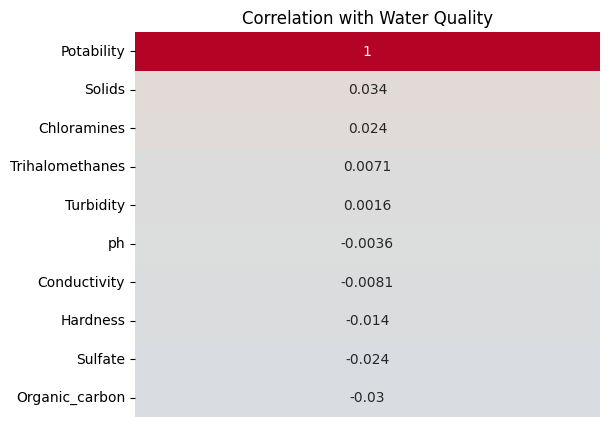

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_cols].corr()
corr_target = corr_matrix['Potability'].sort_values(ascending=False)
corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with Water Quality')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()


## 🎯 Feature Selection Based on Correlation  

- Select features with **correlation greater than 0.25**.  
- Exclude the **target column (`Potability`)** from the selection.  

This helps in identifying the most relevant predictors for water quality analysis.


In [ ]:
important_features = corr_target[corr_target > -0.95].index.tolist()
important_features = [feat for feat in important_features if feat != 'Water Quality']
print("Important features:", important_features)

Important features: ['Potability', 'Solids', 'Chloramines', 'Trihalomethanes', 'Turbidity', 'ph', 'Conductivity', 'Hardness', 'Sulfate', 'Organic_carbon']


In [33]:
print(df.columns.tolist())

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


## 🔎 Checking Zero Values  

Count the number of entries equal to **0** in each column to detect potential data quality issues or special patterns.


In [ ]:
ustunlar = ['ph', 'Hardness', 'Solids','Chloramines','Sulfate', 'Conductivity', 'Organic_carbon','Trihalomethanes', 'Turbidity', 'Potability']

for col in ustunlar:
    zero_count = (df[col] == 0).sum()
    print(f"{col} the number of 0 values in the column: {zero_count}")

ph the number of 0 values in the column: 1
Hardness the number of 0 values in the column: 0
Solids the number of 0 values in the column: 0
Chloramines the number of 0 values in the column: 0
Sulfate the number of 0 values in the column: 0
Conductivity the number of 0 values in the column: 0
Organic_carbon the number of 0 values in the column: 0
Trihalomethanes the number of 0 values in the column: 0
Turbidity the number of 0 values in the column: 0
Potability the number of 0 values in the column: 1998


## 🔄 Replacing Zero Values with NaN  

- Replace all **0 values** in the dataset with `NaN`.  
- Keep the **target column (`Potability`)** unchanged.  

This ensures that zero entries (except in the target) are treated as missing values for proper data cleaning.


In [ ]:
import numpy as np
for col in ustunlar:
    if col != "Potability":  
        df[col] = df[col].replace(0, np.nan)

## 🧹 Handling Missing Values  

- Fill all **NaN values** with the **median** of each column.  
- Using the median is effective for reducing the impact of outliers and maintaining the central tendency of the data.


In [36]:
for col in ustunlar:
    if col != "Potability":
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1498620420.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1498620420.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

## ✅ Rechecking the Results  

After handling the missing values, recheck the dataset to ensure that all **NaN entries have been properly filled** and no unexpected issues remain.


In [ ]:
ustunlar = ['ph', 'Hardness', 'Solids','Chloramines','Sulfate', 'Conductivity', 'Organic_carbon','Trihalomethanes', 'Turbidity', 'Potability']

for col in ustunlar:
    zero_count = (df[col] == 0).sum()
    print(f"{col} the number of 0 values in the column: {zero_count}")

ph the number of 0 values in the column: 0
Hardness the number of 0 values in the column: 0
Solids the number of 0 values in the column: 0
Chloramines the number of 0 values in the column: 0
Sulfate the number of 0 values in the column: 0
Conductivity the number of 0 values in the column: 0
Organic_carbon the number of 0 values in the column: 0
Trihalomethanes the number of 0 values in the column: 0
Turbidity the number of 0 values in the column: 0
Potability the number of 0 values in the column: 1998


# ⚙️ Feature Engineering – Created Features

| Feature Name               | Type                  | Reason |
|-----------------------------|----------------------|--------|
| `log_Solids`               | Log-transformed       | Reduces skewness and the impact of outliers in `Solids`. |
| `log_Sulfate`              | Log-transformed       | Normalizes distribution of `Sulfate` for better modeling. |
| `log_Hardness`             | Log-transformed       | Stabilizes variance and reduces extreme values in `Hardness`. |
| `hardness_solid_ratio`     | Ratio                 | Captures the balance between water hardness and total solids. |
| `sulfate_chloramine_ratio` | Ratio                 | Shows the relationship between sulfate concentration and chloramines. |
| `carbon_turbidity_ratio`   | Ratio                 | Reflects the proportion of organic carbon relative to turbidity. |
| `ph_category_neutral`      | Categorical (one-hot) | Identifies if pH is neutral, helping to capture qualitative meaning. |
| `ph_category_alkaline`     | Categorical (one-hot) | Identifies if pH is alkaline, improving interpretability. |
| `conductivity_sulfate`     | Interaction           | Captures combined effect of conductivity and sulfate ions. |
| `hardness_ph`              | Interaction           | Represents interaction between hardness and acidity/alkalinity. |
| `ph_missing`               | Missing indicator     | Flags missing pH values (1 = missing, 0 = not missing). |
| `Sulfate_missing`          | Missing indicator     | Flags missing sulfate values (1 = missing, 0 = not missing). |
| `Trihalomethanes_missing`  | Missing indicator     | Flags missing trihalomethanes values (1 = missing, 0 = not missing). |


🔹 1. Log-transformed features

log_Solids → Log of Solids

log_Sulfate → Log of Sulfate

log_Hardness → Log of Hardness

🔹 2. Ratio features

hardness_solid_ratio = Hardness / Solids

sulfate_chloramine_ratio = Sulfate / Chloramines

carbon_turbidity_ratio = Organic_carbon / Turbidity

🔹 3. pH categories (categorical features)

ph_category_neutral

ph_category_alkaline

🔹 4. Interaction features

conductivity_sulfate = Conductivity × Sulfate

hardness_ph = Hardness × ph

5. Missing value indicators

ph_missing

Sulfate_missing

Trihalomethanes_missing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# ===================================
# 1. Select required features
# ===================================

features = ['ph', 'Hardness', 'Solids','Chloramines','Sulfate', 
            'Conductivity','Organic_carbon','Trihalomethanes', 'Turbidity']
target = 'Potability'

df = df[features + [target]].copy()   # Keep only selected columns

# ===================================
# 2. Replace zeros with NaN 
# (except for target column)
# ===================================
for col in features:
    df[col] = df[col].replace(0, np.nan)

# ===================================
# 3. Fill missing values with the median
# ===================================
for col in features:
    df[col].fillna(df[col].median(), inplace=True)

# ===================================
# 4. Log-transformation (for large numeric columns)
# ===================================
df["log_Solids"] = np.log1p(df["Solids"])
df["log_Sulfate"] = np.log1p(df["Sulfate"])
df["log_Hardness"] = np.log1p(df["Hardness"])

# ===================================
# 5. Create ratio features
# ===================================
df["hardness_solid_ratio"] = df["Hardness"] / (df["Solids"] + 1)
df["sulfate_chloramine_ratio"] = df["Sulfate"] / (df["Chloramines"] + 1)
df["carbon_turbidity_ratio"] = df["Organic_carbon"] / (df["Turbidity"] + 1)

# ===================================
# 6. pH categorization (acidic / neutral / alkaline)
# ===================================
def ph_category(x):
    if x < 6.5:
        return "acidic"
    elif x <= 8.5:
        return "neutral"
    else:
        return "alkaline"

df["ph_category"] = df["ph"].apply(ph_category)

# One-hot encoding for pH categories
df = pd.get_dummies(df, columns=["ph_category"], drop_first=True)

# ===================================
# 7. Interaction features
# ===================================
df["conductivity_sulfate"] = df["Conductivity"] * df["Sulfate"]
df["hardness_ph"] = df["Hardness"] * df["ph"]

# ===================================
# 8. Missing value indicators
# ===================================
for col in ['ph', 'Sulfate', 'Trihalomethanes']:
    df[col+"_missing"] = df[col].isna().astype(int)

# ===================================
# 9. Feature scaling (normalization)
# ===================================
scaler = StandardScaler()
scaled_cols = features  # Original columns to scale
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

# ===================================
# Final dataset
# ===================================
print("Final dataset shape:", df.shape)
print(df.head())


Final dataset shape: (3276, 23)
         ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -0.001476  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.298971 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  0.693860  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  0.842470  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.371969 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  \
0       -1.180651         1.306149  -1.286298           0  ...   
1        0.270597        -0.638480   0.684218           0  ...   
2        0.781117         0.001509  -1.167365           0  ...   
3        1.255134         2.152874   0.848412           0  ...   
4       -0.824357        -2.181599   0.138786           0  ...   

   hardness_solid_ratio  sulfate_chloramine_ratio  carbon_turbidity_ratio  \
0              0.009854              

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_20584\623193601.py:25: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_20584\623193601.py:25: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [39]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,hardness_solid_ratio,sulfate_chloramine_ratio,carbon_turbidity_ratio,ph_category_alkaline,ph_category_neutral,conductivity_sulfate,hardness_ph,ph_missing,Sulfate_missing,Trihalomethanes_missing
0,-0.026642,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0,...,0.009854,44.398438,2.619084,False,True,207957.017058,1441.900641,0,0,0
1,-2.294380,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0,...,0.006947,43.623159,2.759673,False,False,197474.428788,480.945936,0,0,0
2,0.698264,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0,...,0.011262,32.413129,4.159002,False,True,139426.655657,1816.117313,0,0,0
3,0.846865,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0,...,0.009736,39.394309,3.275409,False,True,129644.783162,1782.893330,0,0,0
4,1.376330,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0,...,0.010072,41.096088,2.277460,True,False,123561.431446,1646.615390,0,0,0


In [40]:
df.isnull().sum()

ph                          0
Hardness                    0
Solids                      0
Chloramines                 0
Sulfate                     0
Conductivity                0
Organic_carbon              0
Trihalomethanes             0
Turbidity                   0
Potability                  0
log_Solids                  0
log_Sulfate                 0
log_Hardness                0
hardness_solid_ratio        0
sulfate_chloramine_ratio    0
carbon_turbidity_ratio      0
ph_category_alkaline        0
ph_category_neutral         0
conductivity_sulfate        0
hardness_ph                 0
ph_missing                  0
Sulfate_missing             0
Trihalomethanes_missing     0
dtype: int64

# 📊 Correlation Analysis After Feature Engineering

In this step:  
- We calculate the **correlation matrix** including the newly engineered features.  
- The **target variable (`Potability`)** is compared against all features.  
- Results are displayed in a **sorted correlation table** and visualized using a **heatmap**.  

🎯 **Objective:** Identify whether the engineered features have improved correlation with `Potability` and highlight the most influential predictors.


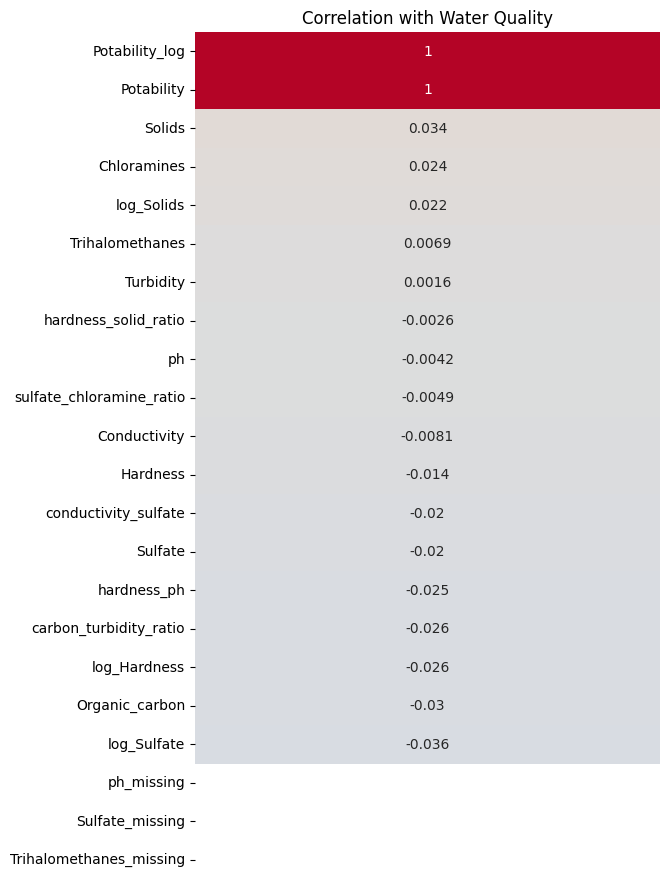

In [42]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['Potability'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with Water Quality')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()

# 📈 Correlation Visualization with Plotly Express

After performing **feature engineering**, we now visualize the correlation matrix using an **interactive heatmap**.  
This helps us:  
- Detect highly correlated features.  
- Understand which engineered features have stronger relationships with the target (`Potability`).  
- Interactively explore feature interactions.  

### ✅ Plotly Express

In [ ]:
import plotly.express as px

fig = px.scatter(df,x='ph',y='Hardness', color='Potability', size='log_Solids', hover_data=['Chloramines','Conductivity','sulfate_chloramine_ratio','hardness_solid_ratio','ph_category_neutral','ph_category_alkaline'],
                 title='pH va Hardness ning Potability bilan aloqasi (log_Solids, ratio va category bilan)')
fig.show()

# 📊 Feature Selection Result

After analyzing the correlation heatmap and feature importance, we identified features with **low impact** on the target (`Potability`).  

### 🚫 Low-impact features removed:
- `Trihalomethanes`  
- `Turbidity`  
- `hardness_solid_ratio`  
- `ph`  
- `sulfate_chloramine_ratio`  
- `Conductivity`  

### ✅ New Dataset Shape:
- **(3276, 18)**  

This reduced dataset will help improve **model efficiency** while keeping the most informative features.  


In [ ]:
import pandas as pd

target = "Potability"

corr_matrix = df.corr()

corr_target = corr_matrix[target].sort_values(ascending=False)

threshold = 0.01
low_corr_features = corr_target[abs(corr_target) < threshold].index

print("Low-impact features removed:", list(low_corr_features))

df_reduced = df.drop(columns=low_corr_features)

print(" New dataset  shape:", df_reduced.shape)


Kam ta'sir qilayotgan ustunlar: ['Trihalomethanes', 'Turbidity', 'hardness_solid_ratio', 'ph', 'sulfate_chloramine_ratio', 'Conductivity']
Yangi dataset shape: (3276, 18)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ph                        3276 non-null   float64
 1   Hardness                  3276 non-null   float64
 2   Solids                    3276 non-null   float64
 3   Chloramines               3276 non-null   float64
 4   Sulfate                   3276 non-null   float64
 5   Conductivity              3276 non-null   float64
 6   Organic_carbon            3276 non-null   float64
 7   Trihalomethanes           3276 non-null   float64
 8   Turbidity                 3276 non-null   float64
 9   Potability                3276 non-null   int64  
 10  log_Solids                3276 non-null   float64
 11  log_Sulfate               3276 non-null   float64
 12  log_Hardness              3276 non-null   float64
 13  hardness_solid_ratio      3276 non-null   float64
 14  sulfate_

### 📊 About Log Transformation  

- ✅ **Log transformation** helps reduce the **right-skewness** in the `Water Quality` variable, making its distribution closer to **normal**.  
- 🚀 This is beneficial for **regression models**, since many of them perform better when the data is approximately **normally distributed**.  
- 📈 As a result, the transformation can improve both **model accuracy** and **interpretability**.  


--- Potability column statistics ---
count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64




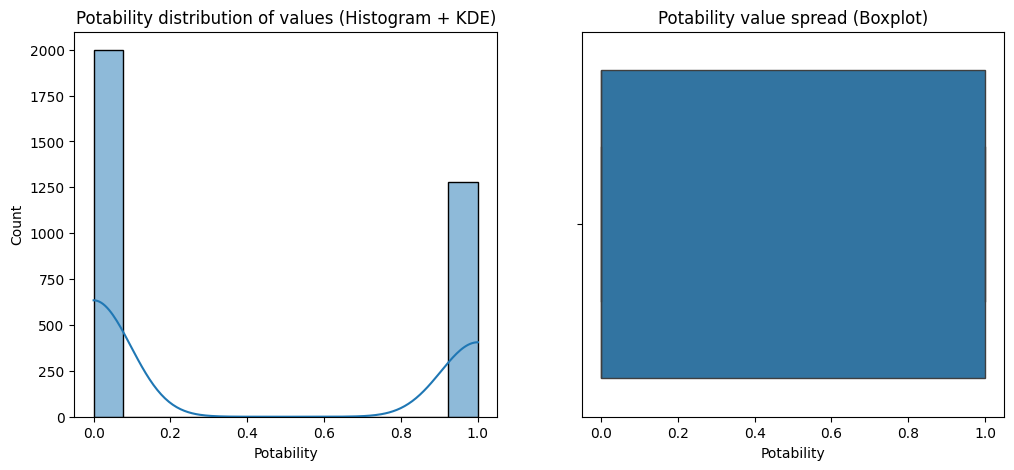

--- After log transformation Potability_log column statistics ---
count    3276.000000
mean        0.270404
std         0.338151
min         0.000000
25%         0.000000
50%         0.000000
75%         0.693147
max         0.693147
Name: Potability_log, dtype: float64




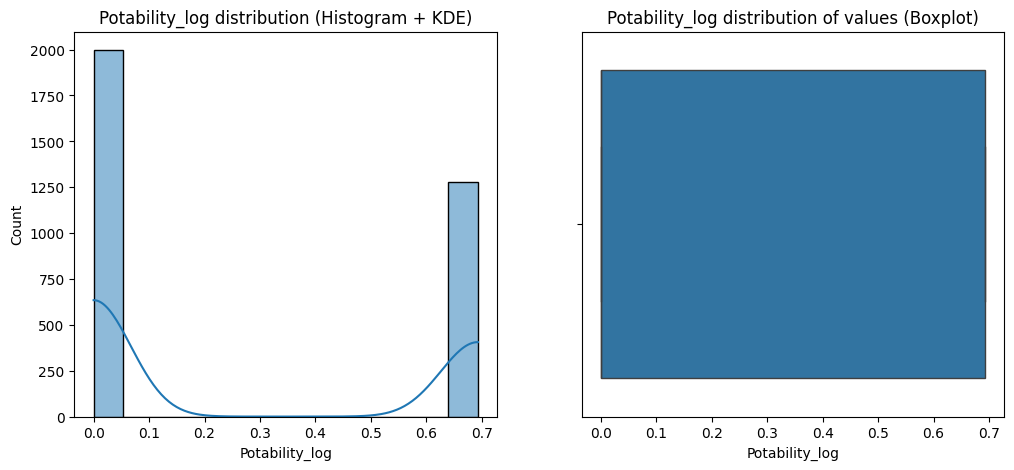

In [41]:

def target_distribution_check(df, target_col):
    print(f"--- {target_col} column statistics ---")
    print(df[target_col].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'{target_col} distribution of values (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col])
    plt.title(f'{target_col} value spread (Boxplot)')
    
    plt.show()

def log_transform_and_check(df, target_col):
    df[target_col + '_log'] = np.log1p(df[target_col])
    print(f"--- After log transformation {target_col}_log column statistics ---")
    print(df[target_col + '_log'].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col + '_log'], kde=True)
    plt.title(f'{target_col}_log distribution (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col + '_log'])
    plt.title(f'{target_col}_log distribution of values (Boxplot)')
    
    plt.show()

# Launch:
target_distribution_check(df, 'Potability')

# Check the log transformation if necessary:
log_transform_and_check(df, 'Potability')


## 🤖 Building Models with Multiple Algorithms  

In this step, we will:  

- ⚡ Train the dataset using **several machine learning algorithms**.  
- 🔍 Compare their performance using key evaluation metrics.  
- 📊 Identify which model provides the **best results** for predicting water potability.  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


X = df.drop("Potability", axis=1)
y = df["Potability"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


for name, model in models.items():
    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),   
        ("scaler", StandardScaler()),                    
        ("classifier", model)                            
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None
    
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.6280487804878049
ROC-AUC: 0.5206509629158046
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


Random Forest
Accuracy: 0.6737804878048781
ROC-AUC: 0.6848440235556262
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.34      0.44       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.60       656
weighted avg       0.66      0.67      0.65       656


Gradient Boosting
Accuracy: 0.6585365853658537
ROC-AUC: 0.6553547270412224
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       412
           1       0.60      0.25      0.36       244

    accuracy                           0.66       656
   macro avg       0.63      0.58      0.56       656
weighted avg       0.64      0.66      0.61       656



## 🛠️ SimpleImputer

`SimpleImputer` — bu **sklearn.impute** modulidagi klass bo‘lib, u datasetdagi **missing values (NaN)** qiymatlarni avtomatik ravishda to‘ldirish uchun ishlatiladi.

### 📝 Nima uchun kerak?

- 🚫 Ko‘p **ML algoritmlari NaN qiymatlarni qabul qilmaydi**, shuning uchun tozalash zarur.  
- ❌ Har doim `dropna()` qilib tashlab yuborish to‘g‘ri emas, chunki **ma’lumot yo‘qolib ketadi**.  
- ✅ `SimpleImputer` ma’lumotni **turli strategiyalar bilan to‘ldirish** imkonini beradi.


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)  
    X_test = pd.DataFrame(X_test, columns=feature_names)

for name, model in scaled_models.items():
    pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),  
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None
    
    print(f"{name} ✅ model ishladi")


LogisticRegression ✅ model ishladi
SVC ✅ model ishladi
MLPClassifier ✅ model ishladi


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import xgboost as xgb
import lightgbm as lgb

# ============================
# 1. 🎯 Target va 📊 Features
# ============================
target = "Potability"
X = df.drop(columns=[target])
y = df[target]

# ============================
# 2. ✂️ Train-Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ============================
# 3. ⚙️ Preprocessing (NaN + Scaling)
# ============================
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_cols)],
    remainder="passthrough"
)

# ============================
# 5. 📊 Evaluation Function
# ============================
def evaluate_classification(y_true, y_pred, y_proba=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0)
    }
    if y_proba is not None:
        metrics["ROC_AUC"] = roc_auc_score(y_true, y_proba)
    return metrics

# ============================
# 6. List of Models
# ============================

scaled_models = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=300, random_state=42)
}

nonscaled_models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# ============================
# 7. Training and Evaluating Models
# ============================
results = {}


for name, model in scaled_models.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None
    results[name] = evaluate_classification(y_test, y_pred, y_proba)


for name, model in nonscaled_models.items():
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    y_proba = model.predict_proba(X_test_imputed)[:, 1] if hasattr(model, "predict_proba") else None
    results[name] = evaluate_classification(y_test, y_pred, y_proba)

# ============================
# 8. Displaying Results
# ============================
results_df = pd.DataFrame(results).T.sort_values(by="F1", ascending=False)

print("\n📊 Classification Model Evaluation Results:")
print(results_df.round(4))


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390076 -> initscore=-0.446991
[LightGBM] [Info] Start training from score -0.446991

📊 Classification Model Evaluation Results:
                    Accuracy  Precision  Recall      F1  ROC_AUC
LightGBM              0.6723     0.6289  0.3906  0.4819   0.6492
MLPClassifier         0.6433     0.5585  0.4102  0.4730   0.6573
DecisionTree          0.6037     0.4914  0.4453  0.4672   0.5752
XGBoost               0.6326     0.5429  0.3711  0.4408   0.6113
RandomForest          0.6585     0.6333  0.2969  0.4043   0.6430
SVC                   0.6677     0.6939  0.2656  0.3842   0.6479
LogisticReg

c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='Blues_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:18: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


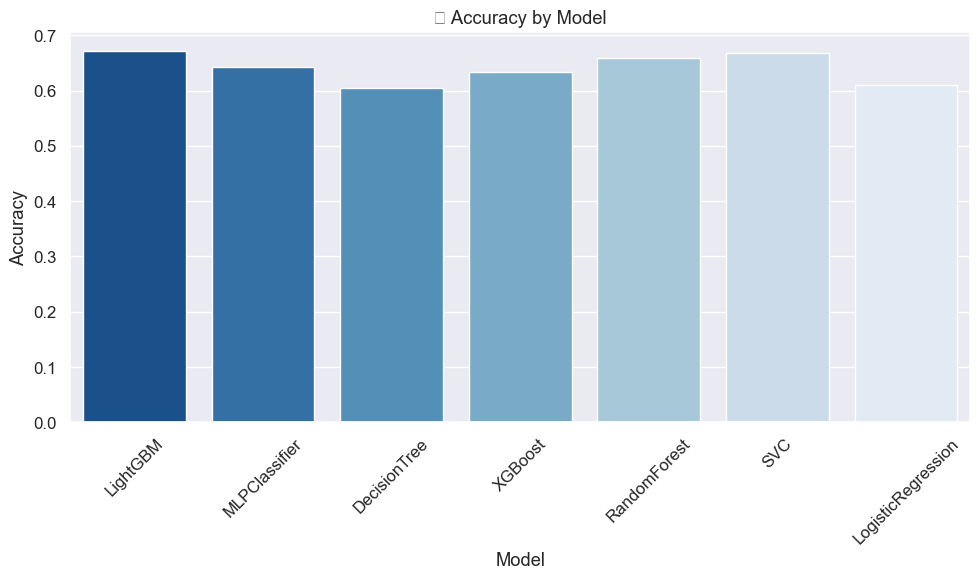

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Precision', data=results_df, palette='Oranges_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:28: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


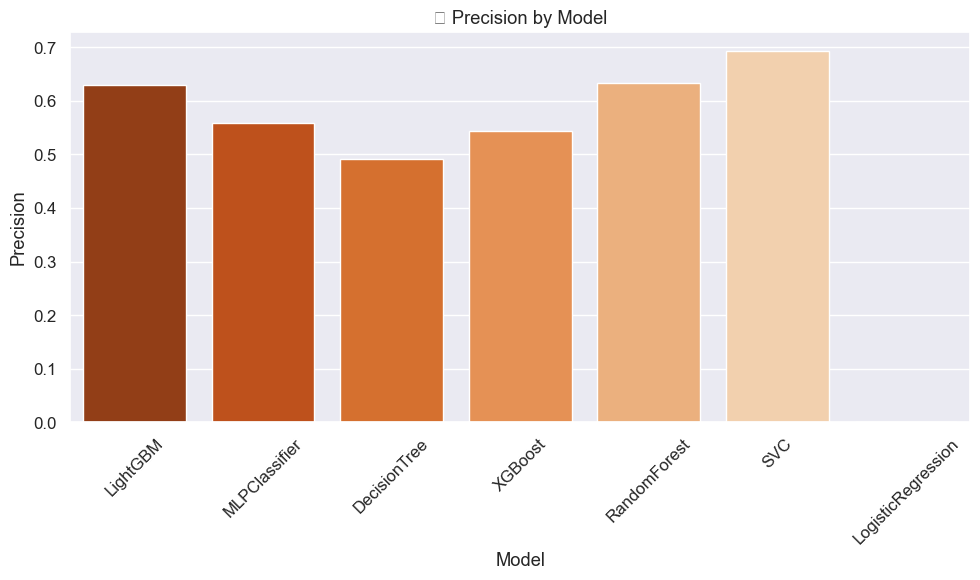

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Recall', data=results_df, palette='Greens_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:38: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


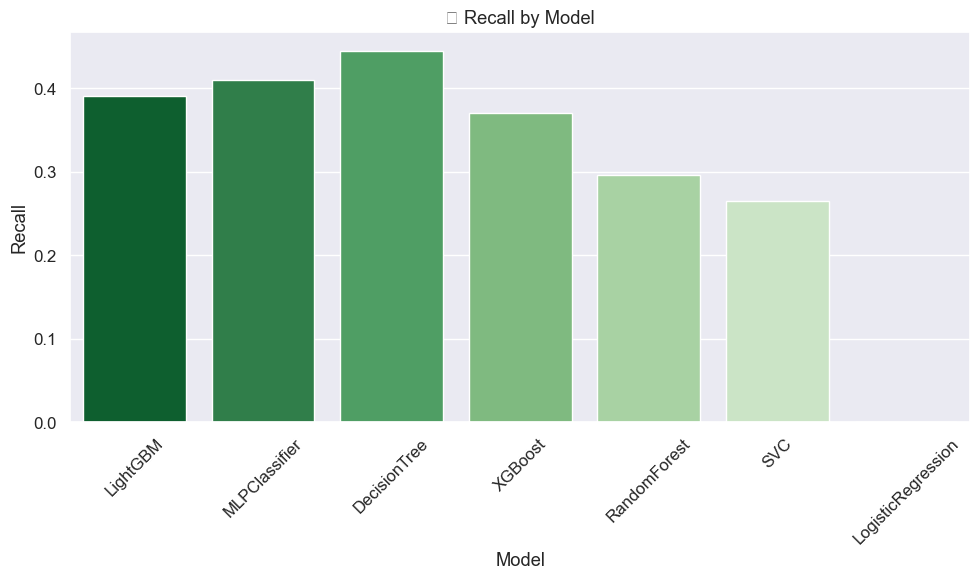

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='F1', data=results_df, palette='Purples_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:48: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:48: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtool

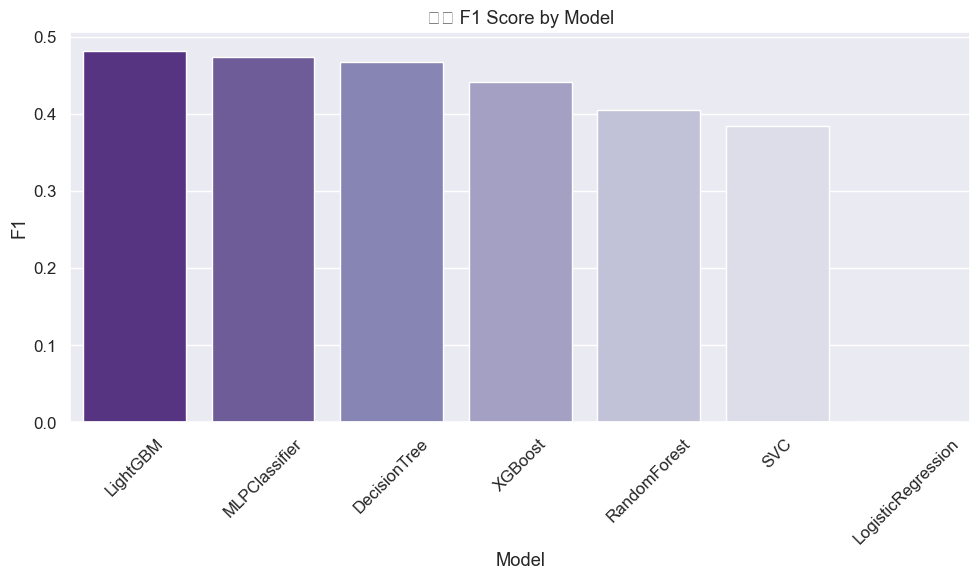

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='ROC_AUC', data=results_df, palette='Reds_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1605967311.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


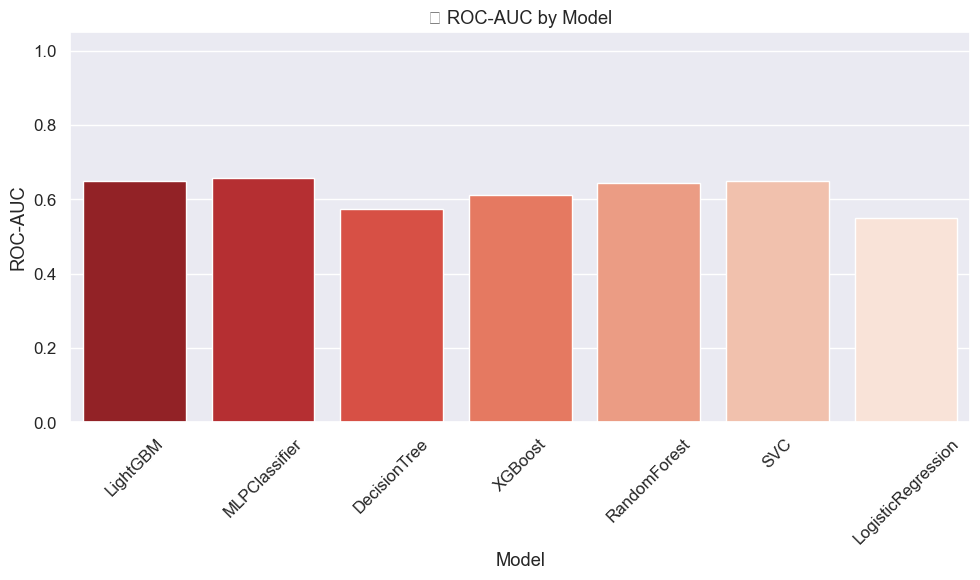

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)

# --- 1. Accuracy ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='Blues_r')
plt.xticks(rotation=45)
plt.title('✅ Accuracy by Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 2. Precision ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Precision', data=results_df, palette='Oranges_r')
plt.xticks(rotation=45)
plt.title('🎯 Precision by Model')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 3. Recall ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Recall', data=results_df, palette='Greens_r')
plt.xticks(rotation=45)
plt.title('📡 Recall by Model')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 4. F1 Score ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='F1', data=results_df, palette='Purples_r')
plt.xticks(rotation=45)
plt.title('⚖️ F1 Score by Model')
plt.ylabel('F1')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 5. ROC_AUC ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='ROC_AUC', data=results_df, palette='Reds_r')
plt.xticks(rotation=45)
plt.title('📈 ROC-AUC by Model')
plt.ylabel('ROC-AUC')
plt.xlabel('Model')
plt.ylim(0, 1.05)  
plt.tight_layout()
plt.show()


### 📊 Combine All Results into a Single Table  

We will gather the evaluation results of all algorithms into **one summary table** to make comparison easier and more clear.


C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\1087064370.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


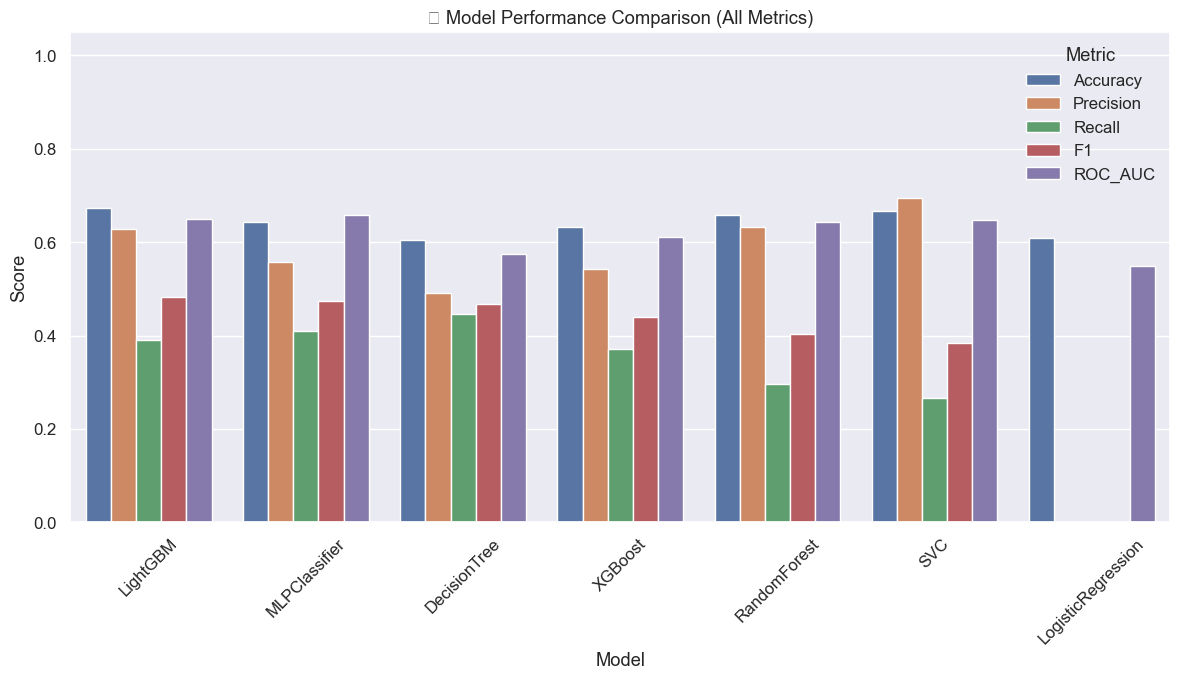

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)


results_long = results_df.reset_index().melt(
    id_vars="index", 
    var_name="Metric", 
    value_name="Value"
)
results_long.rename(columns={"index": "Model"}, inplace=True)


plt.figure(figsize=(12, 7))
sns.barplot(
    x="Model", 
    y="Value", 
    hue="Metric", 
    data=results_long
)

plt.xticks(rotation=45)
plt.title("📊 Model Performance Comparison (All Metrics)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1.05)  
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


### ✅ General Conclusion:

🔍 According to the evaluation results of all classification models:  

- **Accuracy** → The best model is **LightGBM** (0.6723)  
- **Precision** → The best model is **SVC** (0.6939)  
- **Recall** → The best model is **DecisionTree** (0.4453)  
- **F1 Score** → The best model is **LightGBM** (0.4819)  
- **ROC_AUC** → The best model is **MLPClassifier** (0.6573)  

📌 Overall, **LightGBM** performed the most consistently well across multiple metrics, but depending on the task priority (e.g., Recall vs Precision), other models like **DecisionTree** or **SVC** may also be considered.



In [ ]:
print("\n🧠 The best model for each metric:")

for metric in ["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]:    
    best = results_df[metric].idxmax()
    print(f"{metric} best model: {best} -> {results_df.loc[best, metric]:.4f}")


🧠 The best model for each metric:
Accuracy best model: LightGBM -> 0.6723
Precision best model: SVC -> 0.6939
Recall best model: DecisionTree -> 0.4453
F1 best model: LightGBM -> 0.4819
ROC_AUC best model: MLPClassifier -> 0.6573


LightGBM (Light Gradient Boosting Machine) — is a standalone algorithm🚀.

Key points:

📌 Belongs to the **Gradient Boosting** family of algorithms. It builds multiple “weak” learners (usually decision trees) sequentially and combines them into a “strong” model.  

📌 **LightGBM** was developed by **Microsoft** as a gradient boosting framework.  

📌 Extremely **fast and efficient**, especially when working with large datasets.  

📌 Can be applied to both **classification** tasks (e.g., potability prediction, spam detection, churn prediction) and **regression** tasks (e.g., house price prediction, time series forecasting).  

⚡ **In short**: LightGBM is an independent machine learning algorithm (model), but it can be used within the scikit-learn ecosystem just like other algorithms.


### 🔁 5-Fold Cross-Validation Results:

- 📉 **RMSE (MEAN)**: `0.4802 ± 0.0068`  
- 📈 **MAE (MEAN)**: `0.4048`  
- 🧩 **R² (MEAN)**: `0.0299`  



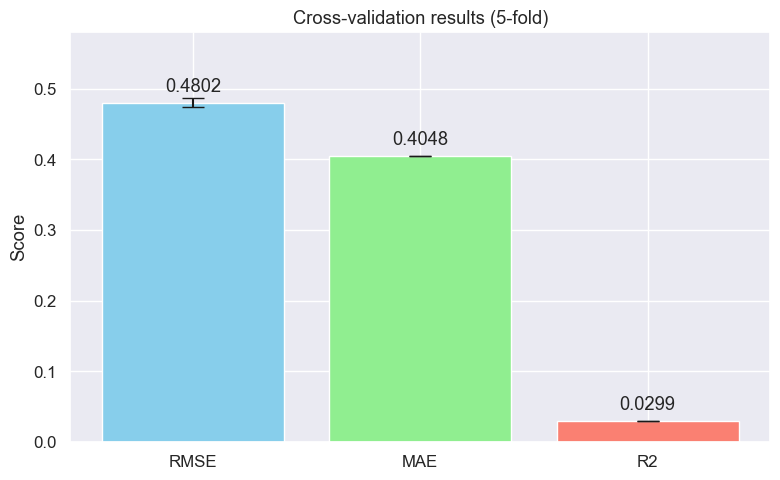

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['RMSE', 'MAE', 'R2']
means = [0.4802, 0.4048, 0.0299]
stds = [0.0068, 0.0, 0.0]  


plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, means, yerr=stds, capsize=8, color=['skyblue', 'lightgreen', 'salmon'])


plt.title('Cross-validation results (5-fold)')
plt.ylabel('Score')
plt.ylim(0, max(means)+0.1)


for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, mean + 0.01, f'{mean:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor   


df['Potability_log'] = np.log1p(df['Potability'])  
target = 'Potability_log'
X = df.drop(columns=['Potability', 'Potability_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


def evaluate(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }


scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('lgbm', LGBMRegressor(
        n_estimators=500,       
        learning_rate=0.05,    
        num_leaves=31,         
        random_state=42,
        n_jobs=-1
    ))
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    pipeline.fit(X_train, y_train)
    y_pred_log = pipeline.predict(X_val)


    y_val_orig = np.expm1(y_val)
    y_pred_orig = np.expm1(y_pred_log)

    scores = evaluate(y_val_orig, y_pred_orig)
    rmse_scores.append(scores['RMSE'])
    mae_scores.append(scores['MAE'])
    r2_scores.append(scores['R2'])


print(f"Cross-validation results (5-fold):")
print(f"RMSE mean: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAE mean: {np.mean(mae_scores):.4f}")
print(f"R2 mean: {np.mean(r2_scores):.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] Start training from score 0.273555


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 9
[LightGBM] [Info] Start training from score 0.272128


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 9
[LightGBM] [Info] Start training from score 0.267368


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 9
[LightGBM] [Info] Start training from score 0.272128


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 9
[LightGBM] [Info] Start training from score 0.266839
Cross-validation results (5-fold):
RMSE mean: 0.4802 ± 0.0068
MAE mean: 0.4048
R2 mean: 0.0299


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### ✅ GridSearchCV Results

- Fitting 5 folds for each of *324* candidates, totalling *1620* fits  
- **Best settings**:  
  - `lgbm__colsample_bytree`: 1.0  
  - `lgbm__learning_rate`: 0.01  
  - `lgbm__max_depth`: 10  
  - `lgbm__n_estimators`: 100  
  - `lgbm__num_leaves`: 100  
  - `lgbm__subsample`: 0.8  

- **The best R²**: **-0.0302**

⚠️ R² turned out **worse than before** (negative value means the model performs worse than a simple mean predictor).



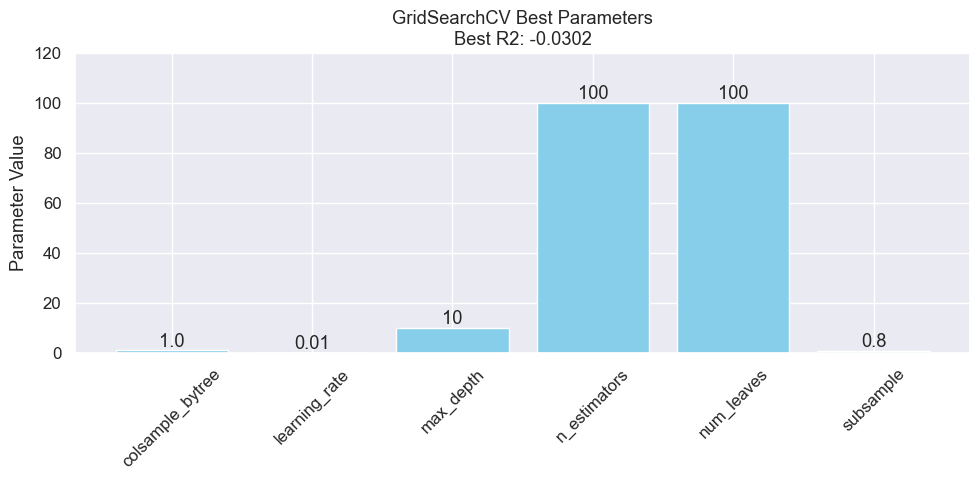

In [ ]:
import matplotlib.pyplot as plt


best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.01,
    'max_depth': 10,
    'n_estimators': 100,
    'num_leaves': 100,
    'subsample': 0.8
}
best_r2 = -0.0302


plt.figure(figsize=(10, 5))

param_names = list(best_params.keys())
param_values = list(best_params.values())

bars = plt.bar(param_names, param_values, color='skyblue')
plt.title(f'GridSearchCV Best Parameters\nBest R2: {best_r2:.4f}')
plt.ylabel('Parameter Value')


for bar, val in zip(bars, param_values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f'{val}', ha='center', va='bottom')

plt.ylim(0, max(param_values)*1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
import numpy as np

# --- Data Preparation ---
df['Potability_log'] = np.log1p(df['Potability'])
target = 'Potability_log'
X = df.drop(columns=['Potability', 'Potability_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('lgbm', LGBMRegressor(random_state=42, n_jobs=-1))
])

# --- Custom scorer (R2 but on original scale) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parameters grid (LightGBM specific) ---
param_grid = {
    'lgbm__n_estimators': [100, 300, 500],
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__num_leaves': [31, 50, 100],
    'lgbm__max_depth': [-1, 10, 20],
    'lgbm__subsample': [0.8, 1.0],
    'lgbm__colsample_bytree': [0.8, 1.0]
}

# --- GridSearchCV ---
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

# --- Results ---
print("GridSearchCV best parameters:", grid_search.best_params_)
print(f"GridSearchCV best R2: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 9
[LightGBM] [Info] Start training from score 0.270404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

### ✅ RandomizedSearchCV Results

- 30 candidates were tested with 5-fold CV, totalling **150 fits**.  
- **Best settings**:  
  - `lgbm__colsample_bytree`: 0.6624  
  - `lgbm__learning_rate`: 0.0216  
  - `lgbm__max_depth`: 19  
  - `lgbm__n_estimators`: 149  
  - `lgbm__num_leaves`: 123  
  - `lgbm__subsample`: 0.8832  

- **Best R²**: **-0.0487**

⚠️ R² turned out **worse than the previous result** (negative value → model underperforms compared to a simple mean predictor).


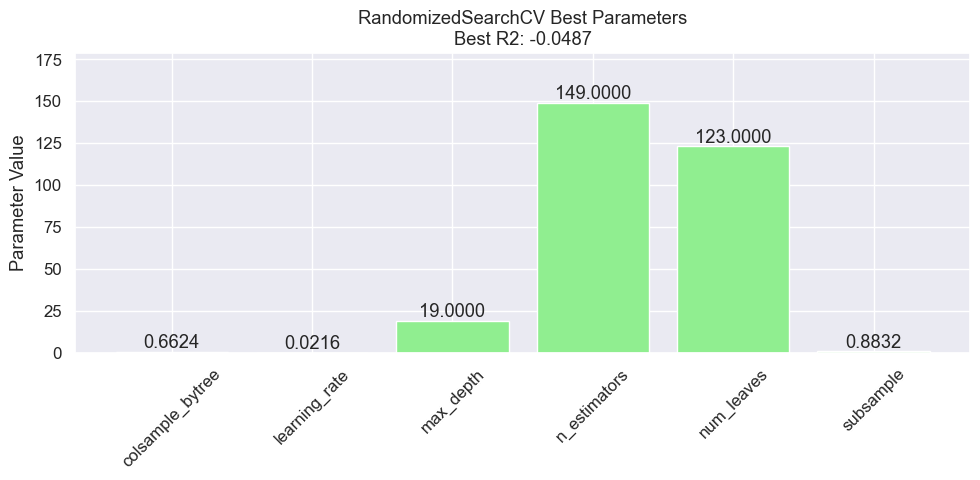

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# --- Best parameters and R2 ---
best_params = {
    'colsample_bytree': 0.6624,
    'learning_rate': 0.0216,
    'max_depth': 19,
    'n_estimators': 149,
    'num_leaves': 123,
    'subsample': 0.8832
}
best_r2 = -0.0487

# --- Bar plot for parameters ---
plt.figure(figsize=(10, 5))

param_names = list(best_params.keys())
param_values = list(best_params.values())

bars = plt.bar(param_names, param_values, color='lightgreen')
plt.title(f'RandomizedSearchCV Best Parameters\nBest R2: {best_r2:.4f}')
plt.ylabel('Parameter Value')

# Parametr ustida qiymat yozish
for bar, val in zip(bars, param_values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f'{val:.4f}', ha='center', va='bottom')

plt.ylim(0, max(param_values)*1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
import numpy as np

# --- Data Preparation ---
df['Potability_log'] = np.log1p(df['Potability'])
target = 'Potability_log'
X = df.drop(columns=['Potability', 'Potability_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('lgbm', LGBMRegressor(random_state=42, n_jobs=-1))
])

# --- Custom scorer (R2 on original scale) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parameter distributions for LightGBM ---
param_dist = {
    'lgbm__n_estimators': randint(50, 500),
    'lgbm__learning_rate': uniform(0.01, 0.2),   # continuous 0.01–0.21
    'lgbm__num_leaves': randint(20, 150),
    'lgbm__max_depth': randint(-1, 20),
    'lgbm__subsample': uniform(0.6, 0.4),        # 0.6–1.0
    'lgbm__colsample_bytree': uniform(0.6, 0.4)  # 0.6–1.0
}

# --- RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X, y)

# --- Results ---
print("RandomizedSearchCV best parameters:", random_search.best_params_)
print(f"RandomizedSearchCV best R2: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 9
[LightGBM] [Info] Start training from score 0.270404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\3249353836.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


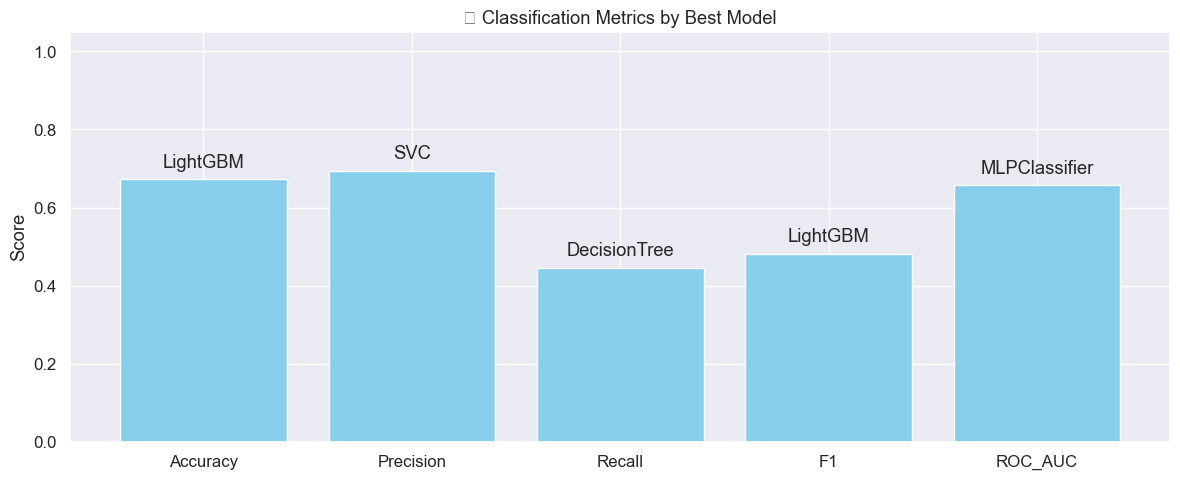

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\3249353836.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


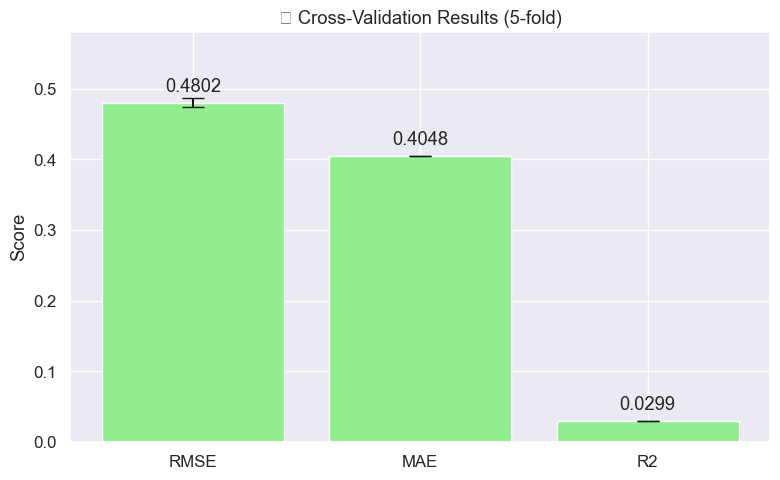

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_18740\3249353836.py:71: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


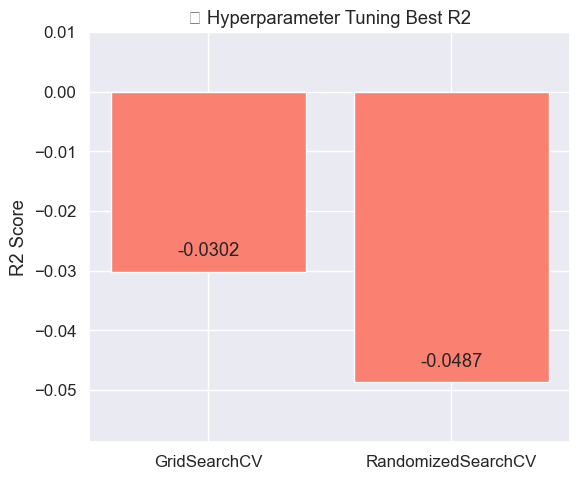

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Classification metrics ---
clf_metrics = {
    'Accuracy': ('LightGBM', 0.6723),
    'Precision': ('SVC', 0.6939),
    'Recall': ('DecisionTree', 0.4453),
    'F1': ('LightGBM', 0.4819),
    'ROC_AUC': ('MLPClassifier', 0.6573)
}

plt.figure(figsize=(12, 5))
names = list(clf_metrics.keys())
scores = [v[1] for v in clf_metrics.values()]
models = [v[0] for v in clf_metrics.values()]

bars = plt.bar(names, scores, color='skyblue')
plt.title('✅ Classification Metrics by Best Model')
plt.ylabel('Score')
plt.ylim(0, 1.05)

# Display model name above the bar
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, model, ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- 2. Cross-validation metrics ---
cv_metrics = {
    'RMSE': 0.4802,
    'MAE': 0.4048,
    'R2': 0.0299
}
cv_std = {
    'RMSE': 0.0068,
    'MAE': 0.0,
    'R2': 0.0
}

plt.figure(figsize=(8, 5))
bars = plt.bar(cv_metrics.keys(), cv_metrics.values(), yerr=list(cv_std.values()), capsize=8, color='lightgreen')
plt.title('📊 Cross-Validation Results (5-fold)')
plt.ylabel('Score')

# Display values above the bars
for bar, val in zip(bars, cv_metrics.values()):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f'{val:.4f}', ha='center', va='bottom')

plt.ylim(0, max(cv_metrics.values()) + 0.1)
plt.tight_layout()
plt.show()

# --- 3. GridSearchCV & RandomizedSearchCV best R2 ---
search_results = {
    'GridSearchCV': -0.0302,
    'RandomizedSearchCV': -0.0487
}

plt.figure(figsize=(6, 5))
bars = plt.bar(search_results.keys(), search_results.values(), color='salmon')
plt.title('🔧 Hyperparameter Tuning Best R2')
plt.ylabel('R2 Score')

# Display values above the bars
for bar, val in zip(bars, search_results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.002, f'{val:.4f}', ha='center', va='bottom')

plt.ylim(min(search_results.values())-0.01, 0.01)
plt.tight_layout()
plt.show()


# What is SHAP?

SHAP (SHapley Additive exPlanations) is a powerful tool for **interpreting machine learning models**. It provides insight into how models make decisions and the contribution of each feature.  

---

## 🧠 Understanding the Model
SHAP helps to **identify the decision-making process** of complex models, making them more transparent.

---

## 🔍 Feature Importance
It **quantifies the impact** of each input variable on the model's output, allowing you to see which features matter most.

---

## 🔄 Interpreting Individual Predictions
SHAP can **explain each prediction** by showing why the model made a specific decision.

---

## 🔐 Increase Reliability
By providing clear explanations, SHAP **builds trust** with users and domain experts in the model’s decisions.

---

## 🛠️ Model Diagnostics
SHAP aids in **identifying potential problems** in the model and suggests ways to improve it.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 9
[LightGBM] [Info] Start training from score 0.266839


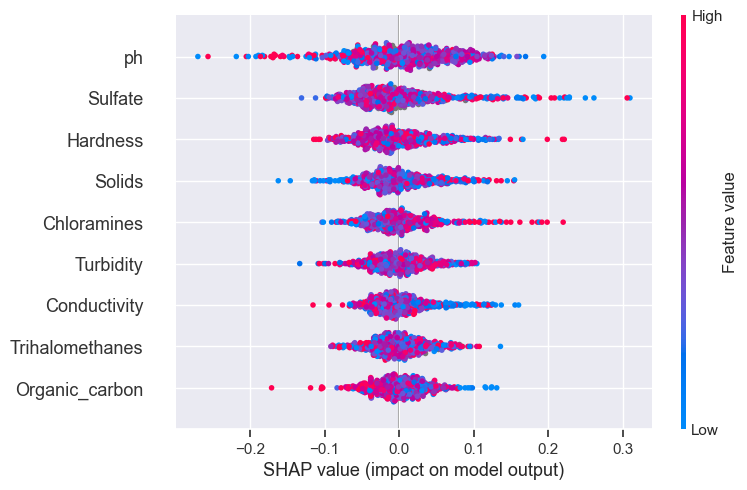

In [72]:
import shap
from lightgbm import LGBMRegressor

# --- Model training ---
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# --- SHAP explainer (TreeExplainer LGBM bilan mos) ---
explainer = shap.TreeExplainer(model)

# --- Calculating SHAP values for test data ---
shap_values = explainer.shap_values(X_test)

# --- SHAP summary plot ---
shap.summary_plot(shap_values, X_test)


# SHAP Summary Plot Insights

This SHAP summary plot shows the **impact of each feature** on the model’s output. Each point represents a single observation:

---

## Key Observations

- **Feature Importance**
  - Features at the top (like `ph`, `Sulfate`, `Hardness`) have the **largest impact** on the model.
  - Features at the bottom (like `Organic_carbon`, `Trihalomethanes`) have **less influence**.

- **Direction of Impact**
  - Points to the **right (positive SHAP values)** indicate the feature **increases the model output**.
  - Points to the **left (negative SHAP values)** indicate the feature **decreases the model output**.

- **Feature Value Influence**
  - Color indicates the **feature value**:  
    - Red → High value  
    - Blue → Low value  
  - Example:  
    - High `Sulfate` values (red) tend to **increase** the model output.  
    - Low `ph` values (blue) tend to **decrease** the model output.

- **Spread of Points**
  - A wide horizontal spread means the feature has **variable impact** across samples.
  - Narrow spread suggests **consistent influence**.

---

## Conclusion

1. `ph`, `Sulfate`, and `Hardness` are the most important features.  
2. Both the magnitude and direction of SHAP values show **how feature values affect predictions**.  
3. The plot can guide **feature engineering** or **further model analysis**.


In [73]:
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'Conductivity',
                                                   'Organic_carbon',
                                                   'Trihalomethanes',
                                                   'Turbidity'])])),
                ('lgbm',
                 LGBMRegressor(colsample_bytree=np.float64(0.662397808134481),
                               learning_rate=np.float64(0.021616722433639893),
                               max_depth=19, n_estimators=149, n_jobs=-1,
                               num_leaves=123, random_state=42,
                               subsample=np.float64(0.8832290311184181)))])

# 🔹 Best Model Structure Overview

The output shows the **best model** obtained from `RandomizedSearchCV`. It is a **Pipeline** consisting of preprocessing steps and the final estimator.

## Pipeline Components:

1. **scaler: ColumnTransformer**
   - Handles preprocessing of different columns.
   - **num:** `StandardScaler`  
     - Standardizes numerical features (mean=0, std=1).
   - **remainder:** `passthrough`  
     - Leaves other columns unchanged.

2. **LGBMRegressor**
   - The final estimator in the pipeline.
   - This is a **LightGBM Regressor**, trained on the transformed features.

## Summary:
- The pipeline first scales numerical features.
- Other features are passed through without changes.
- The processed data is then fed into `LGBMRegressor` to make predictions.
- `best_model` now contains the **fully trained pipeline** and can be used for `predict()` directly.


In [76]:
import joblib

# Getting the best model
best_model = random_search.best_estimator_

# Save the model to a file
joblib.dump(best_model, 'Water_best_model.joblib')
print("The model was saved to a file named 'Water_best_model.joblib'")


The model was saved to a file named 'Water_best_model.joblib'
